In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
train = X[["alcohol", "magnesium"]]

In [3]:
train["eudian_distance"] = np.sqrt(np.square((train["alcohol"]-train["magnesium"])))

/var/folders/0p/s0vjsgq932q9_blttls56g1c0000gn/T/ipykernel_4597/3097771315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["eudian_distance"] = np.sqrt(np.square((train["alcohol"]-train["magnesium"])))


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
test = scaler.fit(train).transform(train)
X = np.delete(test,[2],1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

list_clf = []
print("NN", "Train", "Test")
for number in [1,3,5,10,15,25]:
    clf = KNeighborsClassifier(n_neighbors=number)
    clf.fit(X_train, y_train)
    list_clf.append(clf.fit(X_train, y_train))
    y_predicted1 = clf.predict(X_train)
    y_predicted2 = clf.predict(X_test)
    print(number, np.mean(y_train==y_predicted1), np.mean(y_test==y_predicted2))


NN Train Test
1 0.9924812030075187 0.7111111111111111
3 0.7744360902255639 0.6888888888888889
5 0.7744360902255639 0.7111111111111111
10 0.7518796992481203 0.6888888888888889
15 0.7368421052631579 0.6666666666666666
25 0.7368421052631579 0.6666666666666666


In [203]:
# X = np.delete(X_train,[2],1)

In [7]:
import mlxtend

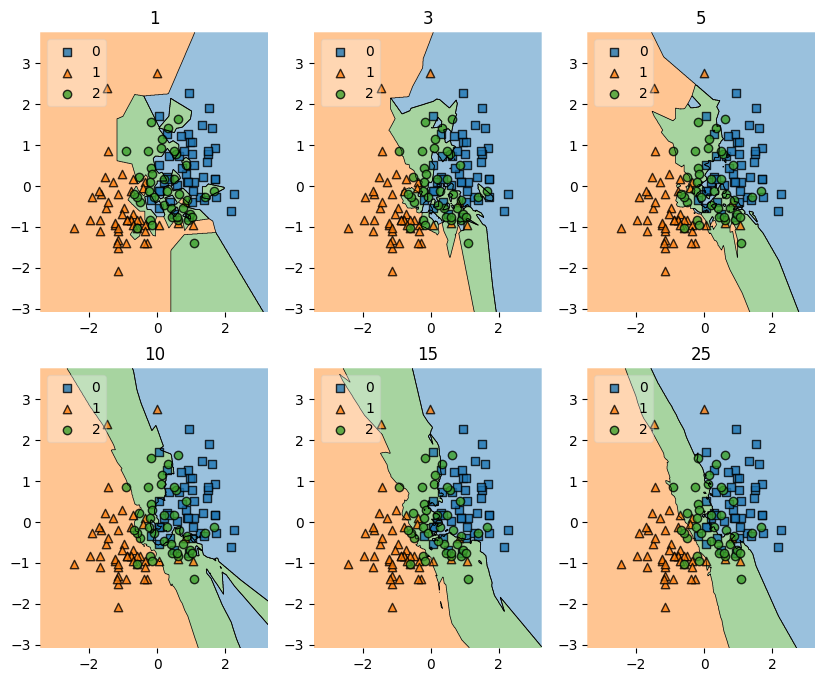

In [14]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = [1,3,5,10,15,25]
for clf, lab, grd, i in zip([list_clf[0], list_clf[1], list_clf[2], list_clf[3], list_clf[4], list_clf[5]],
                         labels,
                         itertools.product([0, 1, 2], repeat=2),
                         range(6)):
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=list_clf[i], legend=2)
    plt.title(lab)

plt.show()

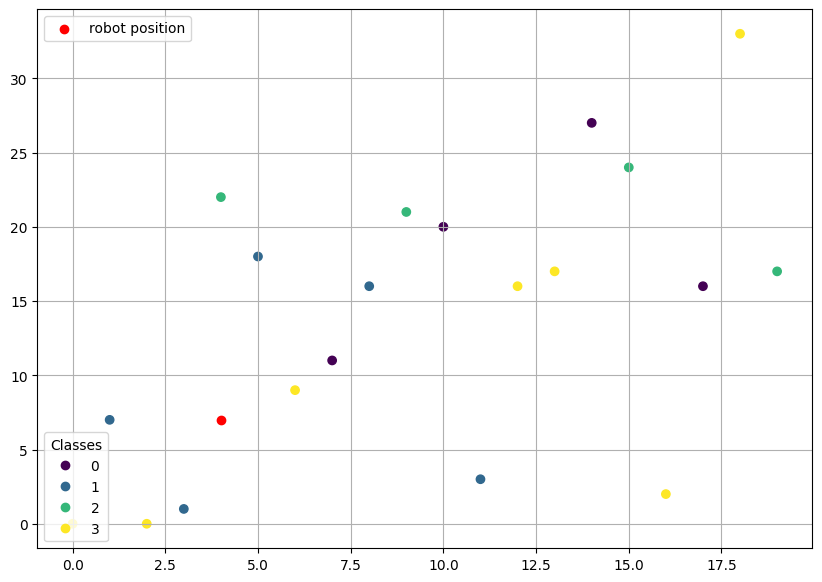

In [2]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20))
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

In [3]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        self.trajectory = initial_position
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        global initial_position
        self.knn.fit(landmarks, classes)
        if np.random.binomial(1, 0.8, 1) == 1:
            initial_position = self.mapping[self.knn.predict(initial_position)[0]]+initial_position
        else:
            initial_position = self.mapping[0]+initial_position
        self.trajectory = np.vstack([self.trajectory, initial_position])

In [4]:
np.random.seed(12345)
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3,
                       initial_position = [[10, 20]]):
    
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    classes = np.random.randint(0, 4, size = len(x))
    robot = MobileRobot(k, initial_position, landmarks, classes)

    for n in range(n_movements):
        robot.move()

    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                            loc="lower left", title="classes")
    ax.add_artist(legend1)

    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
                c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

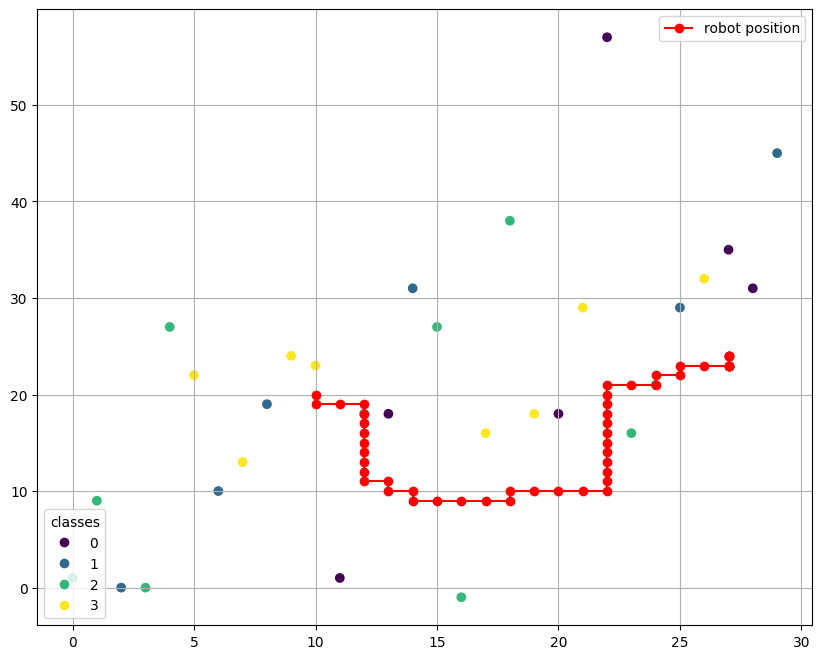

In [14]:
np.random.seed(12345)
x = np.arange(30)
initial_position = [[10, 20]]
mean = 3
std = 10
n_movements = 50
k = 5

landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
classes = np.random.randint(0, 4, size = len(x))
robot = MobileRobot(k, initial_position, landmarks, classes)

for n in range(n_movements):
    robot.move()

fig, ax = plt.subplots(figsize = (10, 8))
scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
legend1 = ax.legend(*scatter.legend_elements(),
                            loc="lower left", title="classes")
ax.add_artist(legend1)

traj = robot.trajectory
ax.plot(traj[:, 0], traj[:, 1], 
                c = 'r', marker = 'o', label = 'robot position')

plt.plot()
_ = plt.legend()
_ = plt.grid()